## PCA-Principal Component Analysis
PCA reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components.

### Task-1 : Exploratory Data Analysis (EDA)
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data


#### 1.Load the dataset and perform basic data exploration.

In [81]:
# Load and Reading the dataset
import pandas as pd
import numpy as np
data=pd.read_csv("wine.csv")

In [82]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [83]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [85]:
# Checking for Null values.
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [86]:
# Statistical Summary of the data.
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### 2.Examine the distribution of features using histograms, box plots, or density plots.

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

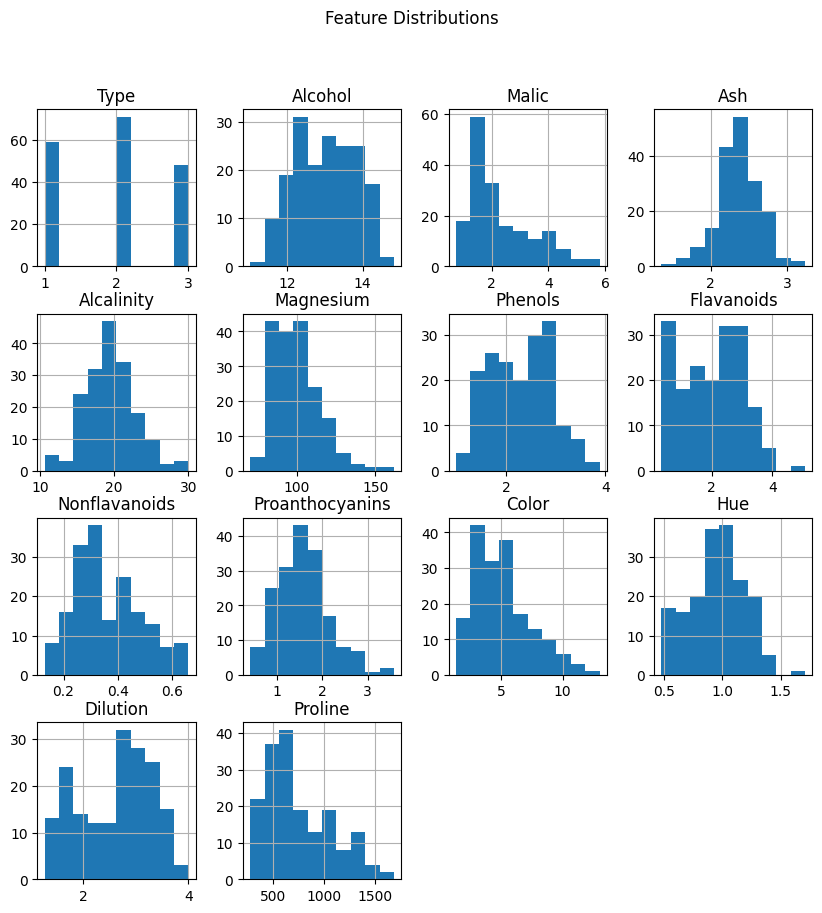

In [88]:
# Feature Distribution
data.hist(bins=10,figsize=(10,10))
plt.suptitle("Feature Distributions")
plt.show()

#### Boxplots For Each Feature

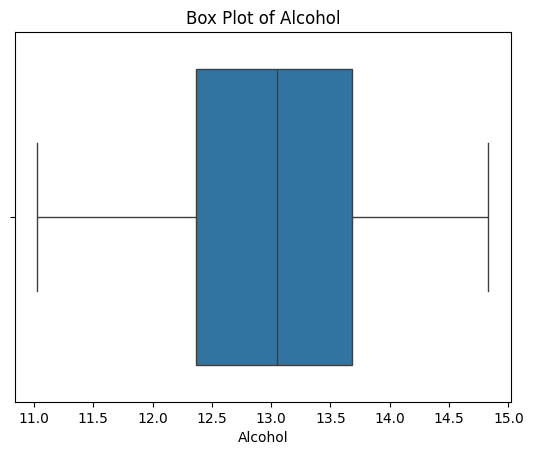

In [89]:
sns.boxplot(data=data['Alcohol'],orient="h")
plt.title("Box Plot of Alcohol")
plt.show()

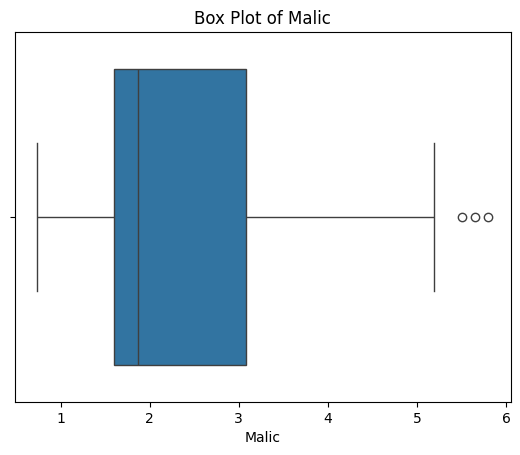

In [90]:
sns.boxplot(data=data['Malic'],orient="h")
plt.title("Box Plot of Malic")
plt.show()

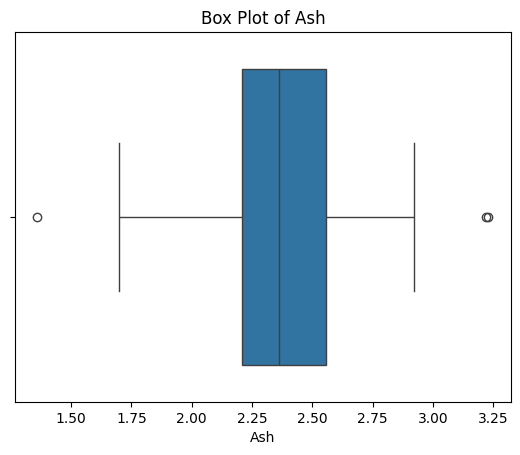

In [91]:
sns.boxplot(data=data['Ash'],orient="h")
plt.title("Box Plot of Ash")
plt.show()

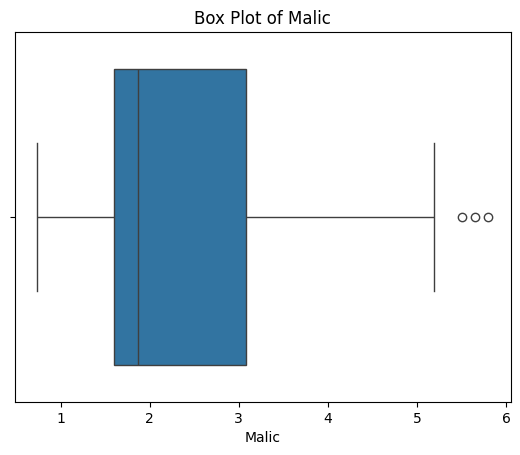

In [92]:
sns.boxplot(data=data['Malic'],orient="h")
plt.title("Box Plot of Malic")
plt.show()

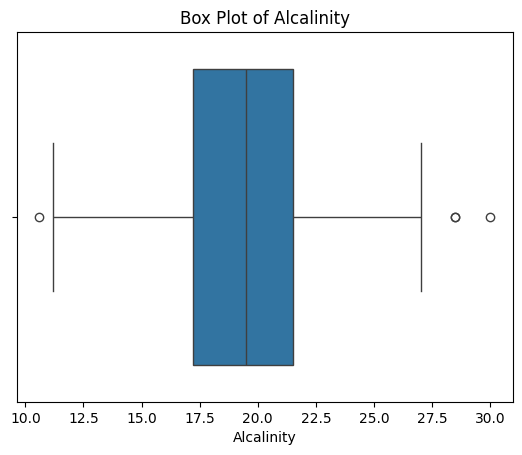

In [93]:
sns.boxplot(data=data['Alcalinity'],orient="h")
plt.title("Box Plot of Alcalinity")
plt.show()

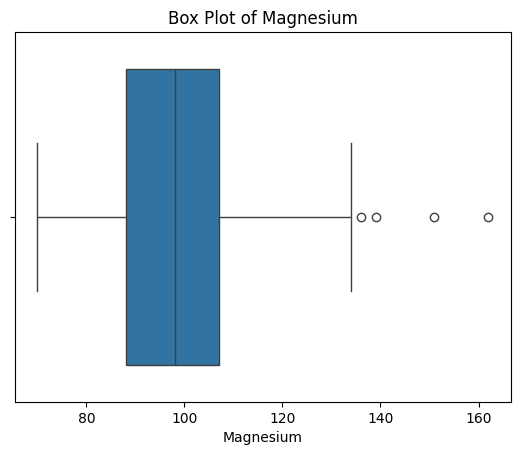

In [94]:
sns.boxplot(data=data['Magnesium'],orient="h")
plt.title("Box Plot of Magnesium")
plt.show()

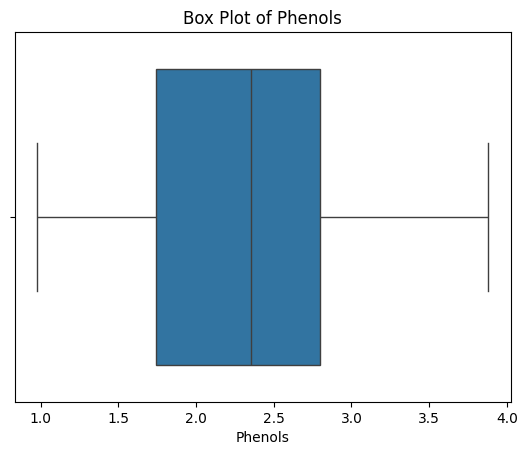

In [95]:
sns.boxplot(data=data['Phenols'],orient="h")
plt.title("Box Plot of Phenols")
plt.show()

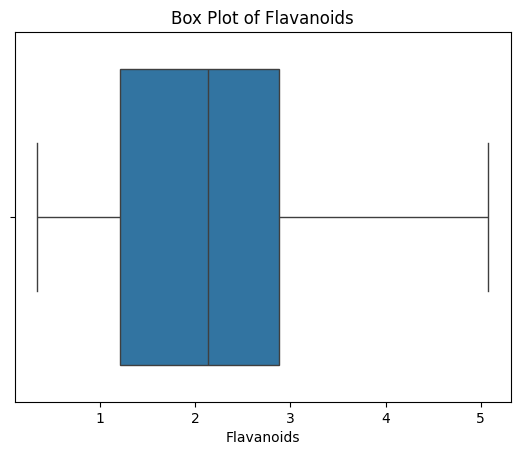

In [96]:
sns.boxplot(data=data['Flavanoids'],orient="h")
plt.title("Box Plot of Flavanoids")
plt.show()

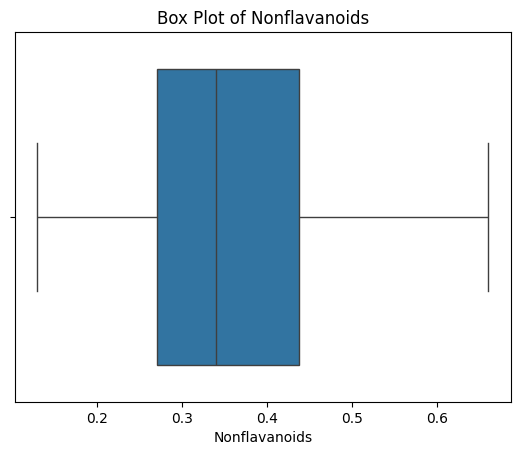

In [97]:
sns.boxplot(data=data['Nonflavanoids'],orient="h")
plt.title("Box Plot of Nonflavanoids")
plt.show()

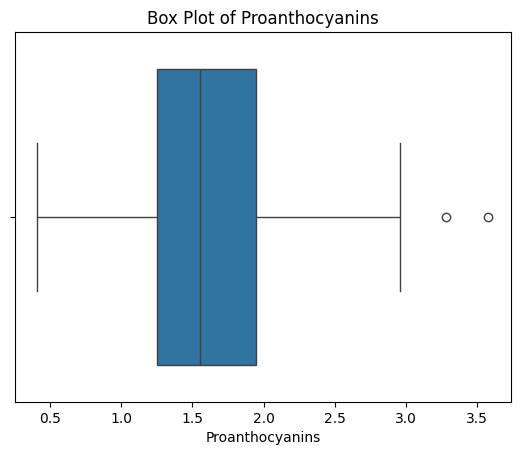

In [98]:
sns.boxplot(data=data['Proanthocyanins'],orient="h")
plt.title("Box Plot of Proanthocyanins")
plt.show()

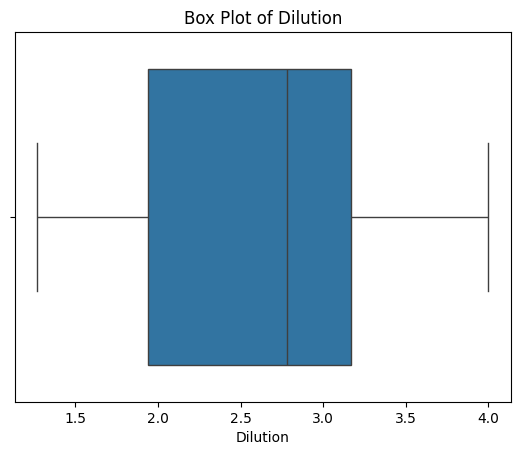

In [99]:
sns.boxplot(data=data['Dilution'],orient="h")
plt.title("Box Plot of Dilution")
plt.show()

#### Density Plots : 
Density plots are a type of data visualization used to represent the distribution of a continuous variable. They show where values are concentrated over an interval, giving a smooth curve rather than a binned histogram, making them excellent for visualizing the distribution's shape, peaks, and spread.

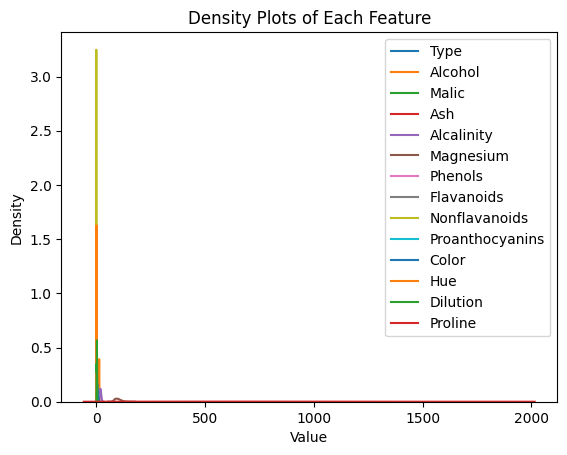

In [ ]:
for col in data.columns:
    sns.kdeplot(data[col],label=col)
plt.title("Density Plots of Each Feature")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

### 3.Investigate correlations between features to understand relationships within the data

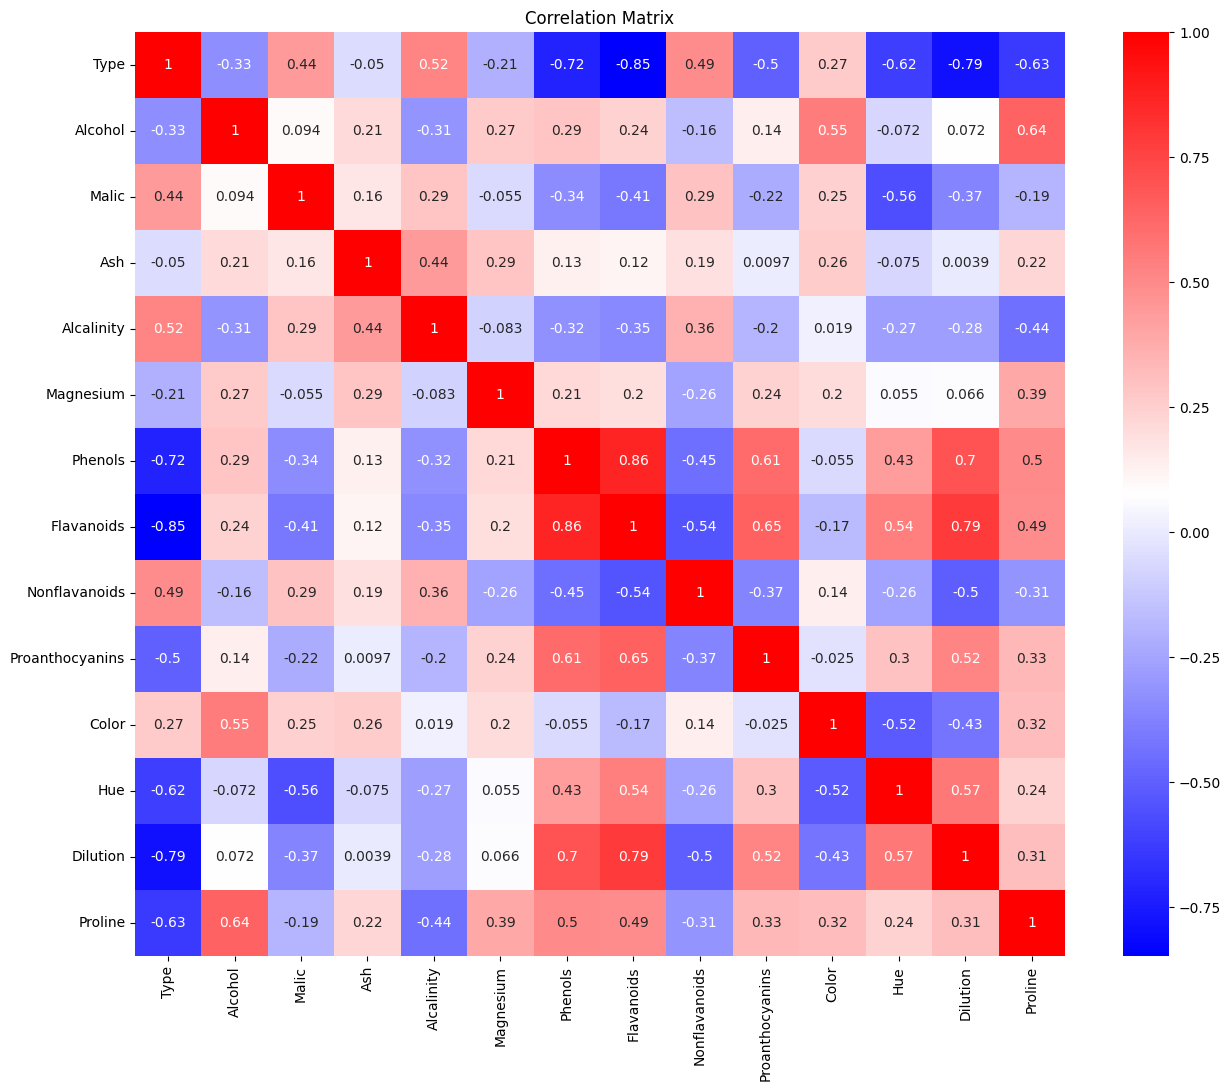

In [101]:
# Correlation Matrix.
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,cmap="bwr")
plt.title("Correlation Matrix")
plt.show()

### Task 2 : Dimensionality Reduction with PCA
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.


#### 1.Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [102]:
from sklearn.preprocessing import StandardScaler

#### Standardization the features.

In [103]:
scaler=StandardScaler()
ScaleData=scaler.fit_transform(data)

#### PCA Implementation.

In [104]:
from sklearn.decomposition import PCA
pca=PCA()
pcadata=pca.fit_transform(ScaleData)

#### 2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

In [105]:
# Assume that you have PCA model `pca` and its explained variance ratio.
explained_variance=pca.explained_variance_ratio_

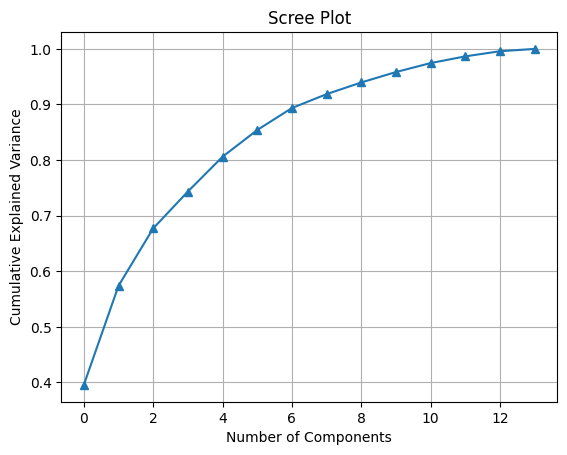

In [106]:
plt.plot(np.cumsum(explained_variance),marker='^')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

#### 3.Transform the original dataset into the principal components.

#### Optimal Number of Principal Components

In [107]:
optcompo=np.argmax(np.cumsum(explained_variance)>=0.95)+1
Pca=PCA(n_components=optcompo)
datapca=pca.fit_transform(ScaleData)
print(f"Optimal number of components:{optcompo}")

Optimal number of components:10


### Task 3 : Clustering with Original Data
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

#### 1.Apply a clustering algorithm (e.g., K-means) to the original dataset.

### KMeans 
K-Means Clustering is a popular unsupervised machine learning algorithm used to group similar data points together. It's a versatile technique with applications in various fields, including data mining, image processing, and customer segmentation.

In [108]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(ScaleData)

c:\Users\khale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 2.Visualize the clustering results using appropriate plots.

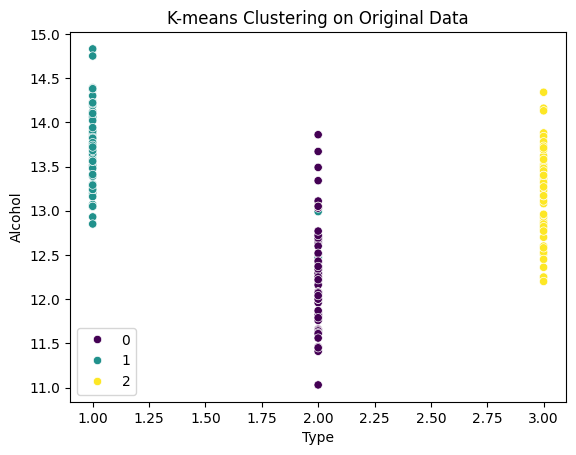

In [109]:
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue=labels,palette='viridis')
plt.title("K-means Clustering on Original Data")
plt.show()

#### 3.Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [ ]:
# Evaluation of clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_kmeans=silhouette_score(data,labels)
db_kmeans=davies_bouldin_score(data,labels)
print(f"Original Data-Silhouette Score:{silhouette_kmeans},Davies-Bouldin Index:{db_kmeans}")

Original Data - Silhouette Score:0.2170641021549303,Davies-Bouldin Index:1.3445623919533116


### Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

#### 1.Apply the same clustering algorithm to the PCA-transformed dataset.

#### K-means clustering on PCA-transformed data

In [112]:
kmpca=KMeans(n_clusters=3,random_state=42)
labelpca=kmpca.fit_predict(datapca)

c:\Users\khale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [113]:
# Evaluation of clustering
silhouette_pca=silhouette_score(datapca,labelpca)
db_pca=davies_bouldin_score(datapca,labelpca)
print(f"PCA Data - Silhouette Score:{silhouette_pca},Davies-Bouldin Index:{db_pca}")

PCA Data - Silhouette Score:0.30773604383565206,Davies-Bouldin Index:1.3163957434114109


#### 2.Visualize the clustering results obtained from PCA-transformed data.

#### Visualization of K-means Clustering on PCA-transformed Data

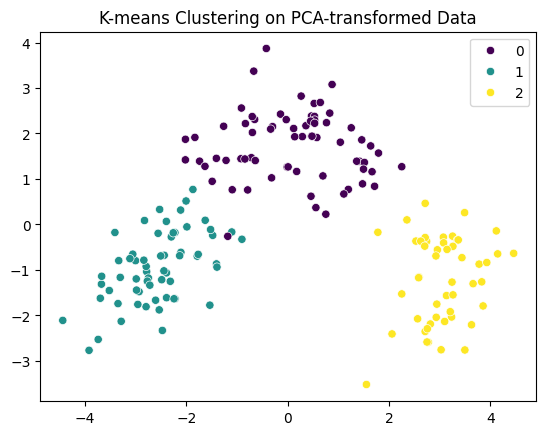

In [116]:
sns.scatterplot(x=datapca[:,0],y=datapca[:,1],hue=labelpca,palette='viridis')
plt.title("K-means Clustering on PCA-transformed Data")
plt.show()

### Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

### Task 6: Conclusion and Insights

1. When comparing clustering results from the original data with those from the PCA-transformed data, we can see some differences in how well the clusters are formed.
2. This can be measured by looking at metrics like the silhouette score and Davies-Bouldin index. A higher silhouette score on the PCA data would suggest that clusters are more clearly separated.
3. A lower Davies-Bouldin index indicates clusters that are tighter and further apart, which is also good. If the PCA data scores better in these metrics, it means reducing the dimensions helped. However, if the original data scores better, it could mean some important information was lost in the dimensionality reduction.

4. Dimensionality reduction, like PCA, affects clustering by making the process faster and easier, especially with high-dimensional data.
5. This can be beneficial if the dataset has many features because it cuts down processing time and complexity. But the downside is that PCA discards some of the finer details, focusing on the most prominent trends.This may mean that smaller, potentially important differences between data points could be lost, leading to less specific clusters.